<font color="#FF5733">


**Version finale du code 1D**


</font>

In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import copy
from ctwr_model import *
from setup_plot import *

# Load experimental data
with open('mistral_exp_3p5.json', 'r') as f:
    donnees_json = json.load(f)

Pour calculer le débit d'eau liquide perdu sous forme de gouttelettes dans le nuage :
$x^{H}-x_{sat}(T_{h}(H)) = \frac{\dot{m_{gout}}}{\dot{m_{d}}}$


<font color="#FF5733">


**-------------------------------------------PARTIE PROPRE AVEC LES FIGURES FINALES---------------------------------------**



</font>

<font color="#FF5733">

**-----------Code propre cas du test bench**


</font>

In [7]:
dico_glob = copy.deepcopy(donnees_json)
N2 = 3000

h_pack = 1.75
h_cold = 10
h_hot = 0.950
S_pack = 49

n_cases = 10
for i in range(1,n_cases + 1):
    print(i)
    P_0 = dico_glob[str(i)]['Patm_Pa']
    mpt_d_i = dico_glob[str(i)]['Qa_kg/s']
    mpt_w_i = dico_glob[str(i)]['Qw_kg/s']
    T_h_i = dico_glob[str(i)]['Ta_est_degC'] + 273.15
    T_w_i = dico_glob[str(i)]['Tin_w_degC'] + 273.15
    x_rel_i = dico_glob[str(i)]['Hr_est_%']*1e-2
    resu_final = solve_ctwr(h_cold, h_pack, h_hot, S_pack, P_0,T_h_i,T_w_i,mpt_d_i,mpt_w_i,x_rel_i, lamb_evap=0.75, n_evap=0.6016)
    dico_glob[str(i)]['Tout_w_degC'] = resu_final[0][0]
    dico_glob[str(i)]['Ta_tuy_degC'] = resu_final[1][N2-1]

1
2
3
4
5
6
7
8
9
10


<font color="#FF5733">

**-----------Partie des Plots des erreurs cas du Test Bench**


</font>

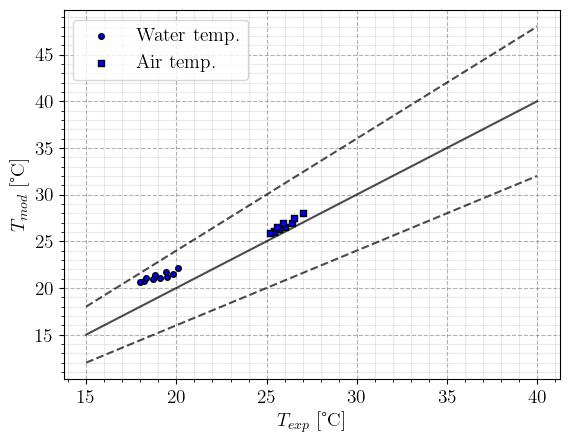

In [9]:
###################### PLOT DE LA FIGURE 6 GAUCHE du papier 

# Water temperatures
L1_w = np.array([dico_glob[str(i)]['Tout_w_degC']-273.15 for i in range(1,n_cases+1)])
L2_w = np.array([donnees_json[str(i)]['Tout_w_degC'] for i in range(1,n_cases+1)])

# Air temperatures
L1_h = np.array([dico_glob[str(i)]['Ta_tuy_degC'] - 273.15 for i in range(1, n_cases+1)])
L2_h = np.array([donnees_json[str(i)]['Ta_tuy_degC'] for i in range(1, n_cases+1)])

X = np.arange(15, 40, 0.01)
errp = [1.2*x for x in X]
errm = [0.8*x for x in X]

fig, ax = plt.subplots()
setup_ax(ax, xlabel=r'$T_{exp}$ [°C]', ylabel=r'$T_{mod}$ [°C]')
ax.plot(X, X, '-', c='k', alpha=0.7)
ax.plot(X, errp, '--', c='k', alpha=0.7)
ax.plot(X, errm, '--', c='k', alpha=0.7)


# Water plot
ax.scatter(L2_w, L1_w, color='b', marker='o', edgecolor='black', label='Water temp.')

# Air plot
ax.scatter(L2_h, L1_h, color='b', marker='s', edgecolor='black', label='Air temp.')

# Légende et labels
ax.legend(loc='best')
plt.savefig('temp.pdf', format='pdf')
plt.show()

6.320902682592521 %


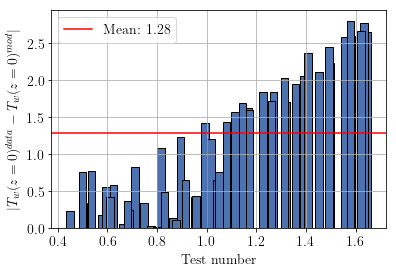

In [118]:
###################### PLOT DE LA FIGURE 6 DROITE du papier 

# Vos données
L1 = np.array([dico_glob[str(i)]['Tout_w_degC'] - 273.15 for i in range(1, 55)])
L2 = np.array([donnees_json[str(i)]['Tout_w_degC'] for i in range(1, 55)])

fa_s_fe = np.array([donnees_json[str(i)]['Fa/Fe'] for i in range(1, 55)])

# Calcul des valeurs absolues des différences
diff_abs = np.abs(L1 - L2)

diff_rel = [np.abs(L1[i] - L2[i])/L2[i] for i in range(len(L1))]

# Calcul de la moyenne
moyenne_diff = np.mean(diff_abs)

print(np.average(diff_rel)*100,'%')
# Création de l'histogramme
plt.figure()
plt.bar(fa_s_fe, diff_abs, color='#4c72b0', edgecolor='black', width=0.03)  # Utilisation de plt.bar() pour spécifier les hauteurs des barres
plt.axhline(y=moyenne_diff, color='r', linestyle='-', label=f'Mean: {moyenne_diff:.2f}')  # Tracer la moyenne en rouge
plt.xlabel('Test number')
plt.ylabel('$|T_{w}(z=0)^{data} - T_{w}(z=0)^{mod}|$')
plt.legend()
plt.grid()
plt.savefig('Fig7droite.pdf', format='pdf')
plt.show()


3.778930560639355 %


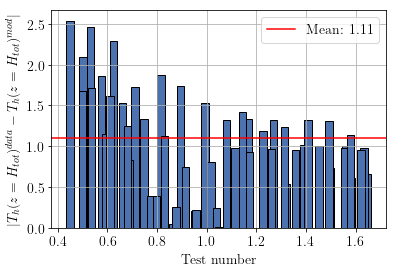

In [119]:
###################### PLOT DE LA FIGURE 7 DROITE du papier 


# Vos données
L1 = np.array([dico_glob[str(i)]['Ta_tuy_degC'] - 273.15 for i in range(1, 55)])
L2 = np.array([donnees_json[str(i)]['Ta_tuy_degC'] for i in range(1, 55)])
fa_s_fe = np.array([donnees_json[str(i)]['Fa/Fe'] for i in range(1, 55)])

# Calcul des valeurs absolues des différences
diff_abs = np.abs(L1 - L2)
diff_rel = [np.abs(L1[i] - L2[i])/L2[i] for i in range(len(L1))]

# Calcul de la moyenne
moyenne_diff = np.mean(diff_abs)
print(np.average(diff_rel)*100,'%')

# Création de l'histogramme
plt.figure()
plt.bar(fa_s_fe, diff_abs, color='#4c72b0', edgecolor='black', width=0.03)  # Utilisation de plt.bar() pour spécifier les hauteurs des barres
plt.axhline(y=moyenne_diff, color='r', linestyle='-', label=f'Mean: {moyenne_diff:.2f}')  # Tracer la moyenne en rouge
plt.xlabel('Test number')
plt.ylabel('$|T_{h}(z=H_{tot})^{data} - T_{h}(z=H_{tot})^{mod}|$')
plt.legend()
plt.grid()
plt.savefig('Fig8droite.pdf', format='pdf')
plt.show()

<font color="#FF5733">

**-----------Code propre et plots cas de DAMPIERRE**


</font>

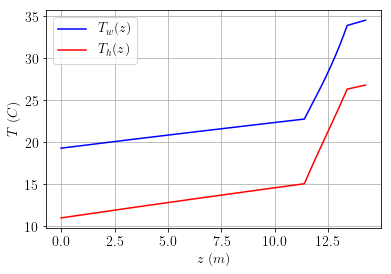

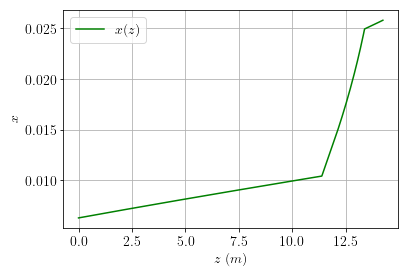

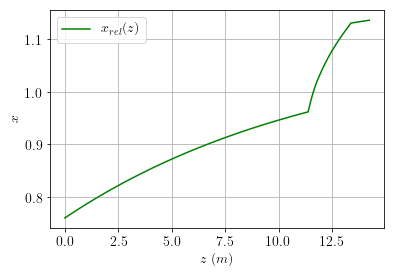

In [107]:

### Parametres geometriques

h_pack = 2
h_hot = 950e-3                                                 
h_cold = 11.34     
S_pack = 11565                                          

P_0 = 1e5
mpt_w_i = 34538
mpt_d_i = 1.229*mpt_w_i
T_h_i = 11 + 273.15
T_w_i = 34.7 + 273.15
x_rel_i = 0.76
result_f = solve_ctwr(h_cold, h_pack, h_hot, S_pack, P_0,T_h_i,T_w_i,mpt_d_i,mpt_w_i,x_rel_i, lamb_evap=0.872, n_evap=0.6)


###################### PLOT DE LA FIGURE 8 GAUCHE du papier

plt.figure()
plt.plot(result_f[4],np.array(result_f[0]) - 273.15,'b-',label='$T_w(z)$')
plt.plot(result_f[4],np.array(result_f[1]) - 273.15,'r-',label='$T_h(z)$')
plt.legend(loc='best')
plt.xlabel('$z\;(m)$')
plt.ylabel('$T\;(°C)$')
plt.grid()
plt.savefig('dampierrefig1.pdf', format='pdf')
plt.show()

###################### PLOT de x(z) mais pas mis dans le papier 

plt.figure()
plt.plot(result_f[4],result_f[2],'g-',label='$x(z)$')
plt.legend(loc='best')
plt.xlabel('$z\;(m)$')
plt.ylabel('$x$')
plt.grid()
plt.savefig('dampierrefig2.pdf', format='pdf')
plt.show()

###################### PLOT DE LA FIGURE 8 DROITE du papier
plt.figure()
plt.plot(result_f[4],np.array(result_f[2])/np.array(result_f[5]),'g-',label='$x_{rel}(z)$')
plt.legend(loc='best')
plt.xlabel('$z\;(m)$')
plt.ylabel('$x$')
plt.grid()
plt.savefig('dampierrefig3.pdf', format='pdf')
plt.show()


<font color="#FF5733">

**-----------calculs pertes en eau cas de DAMPIERRE**


</font>

In [88]:

mpt_w_recup = mpt_d_i*(result_f[2][-1] - result_f[5][-1])

mpt_w_tot_perd = mpt_d_i*result_f[2][-1]
print(100*(mpt_w_recup/34538),100*(mpt_w_tot_perd/34538))

0.4220087592356615 3.2108728034168927


Valeurs de pertes en eau en fonction des paramètres que l'on ne controle pas 
- température de l'air :
    
    - $T_h = 7°C$ donne $\dot{m}_{recup} \approx 159 kg/s$ ; $\dot{m}_{perd} \approx 1073 kg/s$
    - $T_h = 11°C$ donne $\dot{m}_{recup} \approx 110 kg/s$ ; $\dot{m}_{perd} \approx 1076 kg/s$
    - $T_h = 15°C$ donne $\dot{m}_{recup} \approx 67.7 kg/s$ ; $\dot{m}_{perd} \approx 1090 kg/s$
    - $T_h = 18°C$ donne $\dot{m}_{recup} \approx 40.9 kg/s$ ; $\dot{m}_{perd} \approx 1108 kg/s$
    - $T_h = 21°C$ donne $\dot{m}_{recup} \approx 17.9 kg/s$ ; $\dot{m}_{perd} \approx 1131 kg/s$
    - $T_h = 25°C$ donne $\dot{m}_{recup} \approx 0 kg/s$ (car pas de sursaturation) ; $\dot{m}_{perd} \approx 1170 kg/s$


- humidité en entrée :
    - $x_{rel} = 35 \% $ donne $\dot{m}_{recup} \approx 56.7 kg/s$ ; $\dot{m}_{perd} \approx 1073 kg/s$
    - $x_{rel} = 45 \% $ donne $\dot{m}_{recup} \approx 64.4 kg/s$ ; $\dot{m}_{perd} \approx 1085 kg/s$
    - $x_{rel} = 55 \% $ donne $\dot{m}_{recup} \approx 73.6 kg/s$ ; $\dot{m}_{perd} \approx 1100 kg/s$
    - $x_{rel} = 65 \% $ donne $\dot{m}_{recup} \approx 83.7 kg/s$ ; $\dot{m}_{perd} \approx 1114 kg/s$


In [90]:
alti = result_f[4]
x = result_f[2]


cond1 = False
cond2 = False
cond3 = False


m_pluie1 = 0
m_pack = 0
m_pluie2 = 0

H = 2
h2 = 950e-3                                                 
h1 = 11.34 

for i in range(0,N2):
    if alti[i] >= h1 and cond1 == False :
        print(x[0])
        print("cold_rain")
        print(x[i-1])
        m_pluie1 = mpt_d_i*(x[i-1] - x[0])
        cond1 = True
    if alti[i] >= H + h1 and cond2 == False :
        print("pack")
        print(x[i-1])
        m_pack = mpt_d_i*(x[i-1]) - (m_pluie1 + mpt_d_i*x[0])
        cond2 = True
    if alti[i] >= H+h1+h2 and cond3 == False:
        print("hot_rain")
        print(x[i-1])
        m_pluie2 = mpt_d_i*(x[i-1]) - (m_pack + m_pluie1 + mpt_d_i*x[0])
        cond3 = True


m_pluie = m_pluie1 + m_pluie2
m_sum = m_pack + m_pluie1 + m_pluie2
       
contrib_pluie = m_pluie*100/m_sum
contrib_pack = m_pack*100/m_sum


print(contrib_pluie, contrib_pack)

0.006283312291108473
cold_rain
0.010390694203343565
pack
0.024985923461585128
21.96154256106695 78.03845743893305
